In [19]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from joblib import dump
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from scipy.stats import linregress, skew, kurtosis

import matplotlib.pyplot as plt
from scipy import stats

In [20]:
# 读取CSV文件
df1 = pd.read_csv('mlp_input_received_128.csv')
df2 = pd.read_csv('mlp_input_received_256.csv')
df3 = pd.read_csv('mlp_input_received_512.csv')
df4 = pd.read_csv('mlp_input_received_1024.csv')
df5 = pd.read_csv('mlp_input_received_2048.csv')
df6 = pd.read_csv('mlp_input_received_4096.csv')
df7 = pd.read_csv('mlp_input_received_8192.csv')
df8 = pd.read_csv('cnn_input_received_128.csv')
df9 = pd.read_csv('cnn_input_received_256.csv')
df10 = pd.read_csv('cnn_input_received_512.csv')
df11 = pd.read_csv('cnn_input_received_1024.csv')
df12 = pd.read_csv('cnn_input_received_2048.csv')
df13 = pd.read_csv('cnn_input_received_4096.csv')
df14 = pd.read_csv('cnn_input_received_8192.csv')



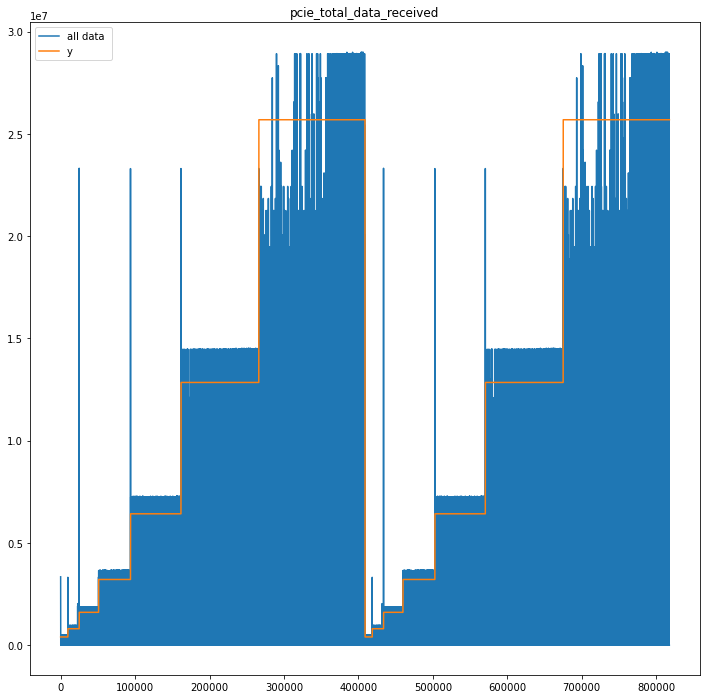

In [21]:
# 提取数据
data1 = df1.iloc[:, 2]
data2 = df2.iloc[:, 2]
data3 = df3.iloc[:, 2]
data4 = df4.iloc[:, 2]
data5 = df5.iloc[:, 2]
data6 = df6.iloc[:, 2]
data7 = df7.iloc[:, 2]
data8 = df1.iloc[:, 2]
data9 = df2.iloc[:, 2]
data10 = df3.iloc[:, 2]
data11 = df4.iloc[:, 2]
data12 = df5.iloc[:, 2]
data13 = df6.iloc[:, 2]
data14 = df7.iloc[:, 2]


# Combine the data
X = data1.append([data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14], ignore_index=True)

# Create target values
imgae_size= 784*4
y = pd.Series([128*imgae_size]*len(data1) + [256*imgae_size]*len(data2) + [512*imgae_size]*len(data3) + [1024*imgae_size]*len(data4) + [2048*imgae_size]*len(data5) + [4096*imgae_size]*len(data6) + [8192*imgae_size]*len(data7) + [128*imgae_size]*len(data8) + [256*imgae_size]*len(data9) + [512*imgae_size]*len(data10) + [1024*imgae_size]*len(data11) + [2048*imgae_size]*len(data12) + [4096*imgae_size]*len(data13) + [8192*imgae_size]*len(data14))


# Plotting all time series data together
plt.figure(figsize=(12, 12))
plt.plot(X, label='all data ')
plt.plot(y, label='y')
# plt.plot(data3, label='Batchs size: 512, transfer size = 1.53125 MB')
# plt.plot(data4, label='Batchs size: 1024, transfer size = 3.0625 MB')
# plt.plot(data5, label='Batchs size: 2048, transfer size = 6.125 MB')
plt.title('pcie_total_data_received')
plt.legend()
plt.show()


In [ ]:
# Define window size
window_size = 100

# Feature Extraction Function
def extract_window_features(series, window_size):
    slope, _, _, _, _ = linregress(np.arange(window_size), series)
    return {
        'mean': series.mean(),
        'std': series.std(),
        'min': series.min(),
        'max': series.max(),
        'slope': slope,
        'skew': skew(series),
        'kurtosis': kurtosis(series)
    }

# Applying the sliding window
feature_list = []
for i in range(len(X) - window_size + 1):
    window = X[i:i + window_size]
    features = extract_window_features(window, window_size)
    feature_list.append(features)

# Convert the feature list to a DataFrame
X_features = pd.DataFrame(feature_list)

# Adjust the target to match the features length
y_adjusted = y[window_size - 1:]

In [ ]:
np.savetxt('X_features.csv', X, delimiter=',')
np.savetxt('y_adjusted.csv', y_adjusted, delimiter=',')


In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_features, y_adjusted, test_size=0.2, random_state=42)


In [ ]:

# Define models
models = {
    "KNN": KNeighborsRegressor(n_neighbors=5, weights='uniform', metric='euclidean'),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.5),
    "LightGBM": LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, num_leaves=31)
}

# Train, evaluate, and save models
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Save model
    joblib.dump(model, f'{name}_model.pkl')

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)
    
    print(f"{name} Model Evaluation:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R2 Score: {r2}")
    print(f"  Explained Variance: {explained_variance}\n")